<a href="https://colab.research.google.com/github/kumar-kunal/Data-Science/blob/master/image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import os
import glob
import math
from scipy import ndimage
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


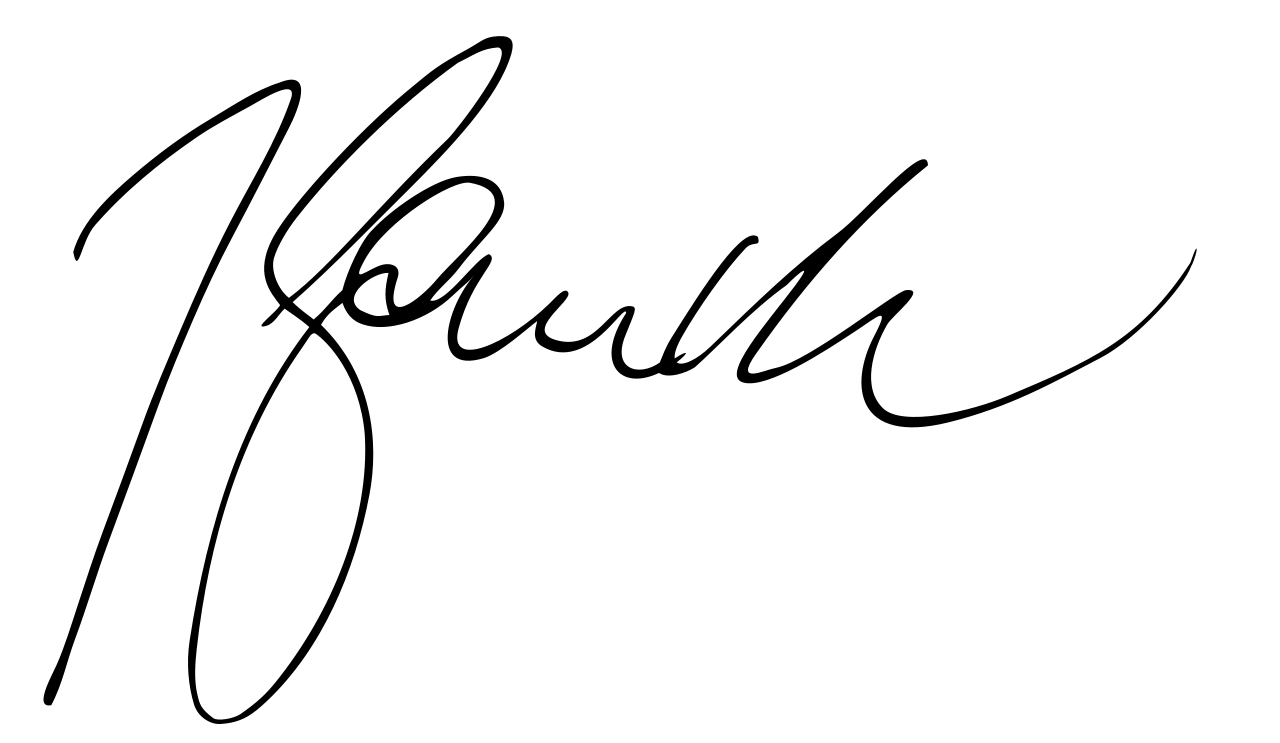

In [0]:
# load image
im = Image.open("/content/drive/My Drive/sign-recg/DatForIMGprocessing/sign.png")
display(im)

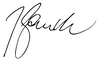

In [0]:
# Resize image
width, height = im.size
# print(width,height)
aspect_ratio = width/height
# print(aspect_ratio)
# let height is 60
im_height = 60
im_width = int(im_height * aspect_ratio)
resized_im = im.resize((im_width,im_height), Image.ANTIALIAS)
display(resized_im)

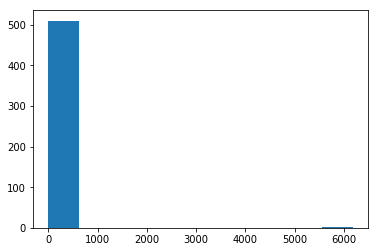

In [0]:
# change image mode
# print(resized_im.mode)
img = resized_im.convert('LA')
plt.hist(img.histogram())
plt.show()

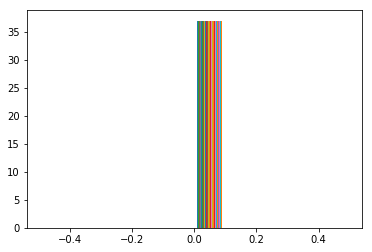

In [0]:
im_cv = cv2.imread('/content/drive/My Drive/sign-recg/DatForIMGprocessing/sign.png')
gray_im_cv = cv2.cvtColor(im_cv, cv2.COLOR_BGR2GRAY)
rsz_im_cv = cv2.resize(gray_im_cv, None, fx=0.05, fy=0.05)
plt.hist(rsz_im_cv)
plt.show()

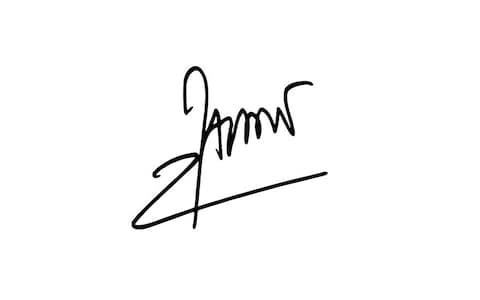

In [0]:
#******** Code Using OpenCv**********

# Read
im3 = cv2.imread('/content/drive/My Drive/sign-recg/DatForIMGprocessing/sign2.jpg') 
cv2_imshow(im3)

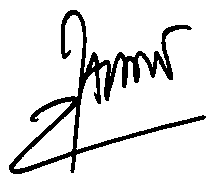

In [0]:
#********* convert to gray scale and finding edge of image
gray3 = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)

retval3, thresh_gray3 = cv2.threshold(gray3, thresh=100, maxval=255, type=cv2.THRESH_BINARY)

points3 = np.argwhere(thresh_gray3==0)
points3 = np.fliplr(points3)
x3, y3, w3, h3 = cv2.boundingRect(points3)
x3, y3, w3, h3 = x3-10, y3-10, w3+20, h3+20
crop3 = gray3[y3:y3+h3, x3:x3+w3]

retval3, thresh_crop3 = cv2.threshold(crop3, thresh=200, maxval=255, type=cv2.THRESH_BINARY)

cv2_imshow(thresh_crop3) 

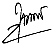

In [0]:
#****** Resizing to bit small********
rsz_img3 = cv2.resize(thresh_crop3, None, fx=0.25, fy=0.25)
cv2_imshow(rsz_img3)

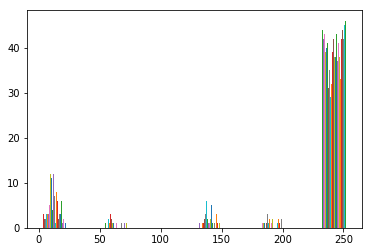

In [0]:
#**********plotting histogram***********
plt.hist(rsz_img3)
plt.show()

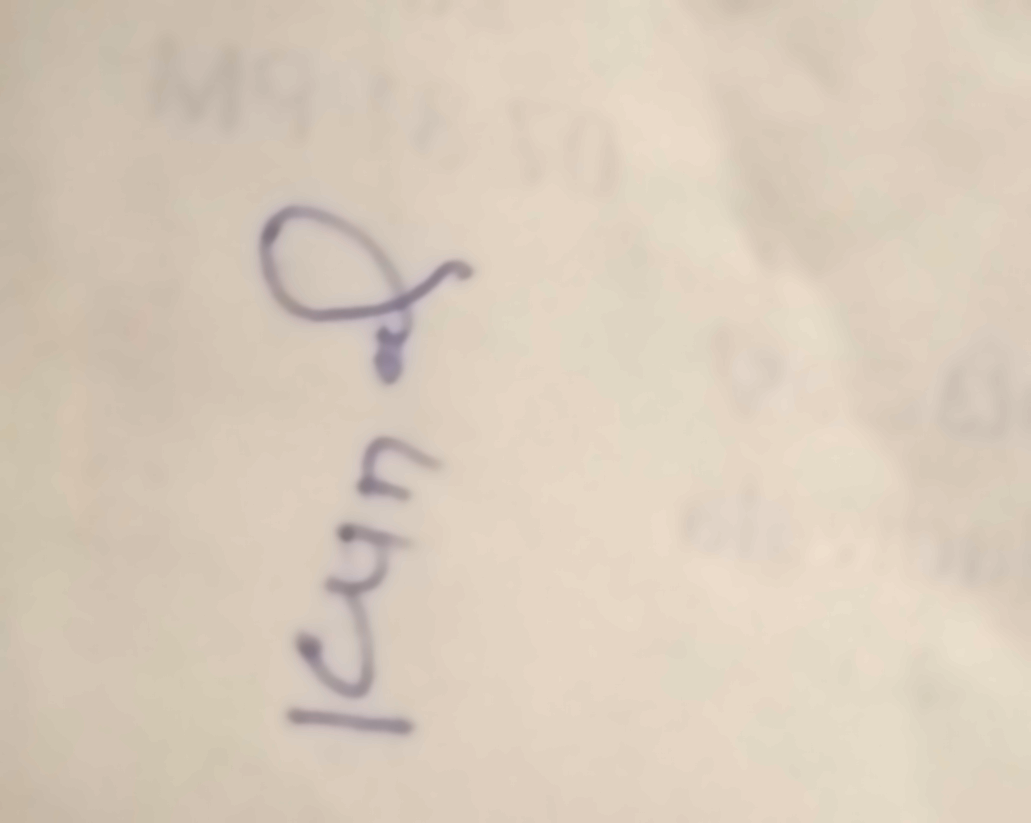

In [0]:
kk_true_4 = cv2.imread('/content/drive/My Drive/sign-recg/DatForIMGprocessing/kk_true_4.jpg') 
kk_true_4 = cv2.fastNlMeansDenoisingColored(kk_true_4, None, 10, 10, 7, 15) 
cv2_imshow(kk_true_4)

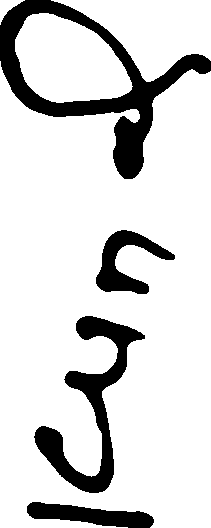

In [0]:
kk_true_4_gray = cv2.cvtColor(kk_true_4, cv2.COLOR_BGR2GRAY)

kk_true_4_retval, kk_true_4_thresh_gray = cv2.threshold(kk_true_4_gray, thresh=167, maxval=255, type=cv2.THRESH_BINARY)

kk_true_4_points = np.argwhere(kk_true_4_thresh_gray==0)
kk_true_4_points = np.fliplr(kk_true_4_points)
kk_true_4_x, kk_true_4_y, kk_true_4_w, kk_true_4_h = cv2.boundingRect(kk_true_4_points)
kk_true_4_x, kk_true_4_y, kk_true_4_w, kk_true_4_h = kk_true_4_x, kk_true_4_y, kk_true_4_w, kk_true_4_h
kk_true_4_crop = kk_true_4_gray[kk_true_4_y:kk_true_4_y+kk_true_4_h, kk_true_4_x:kk_true_4_x+kk_true_4_w]

kk_true_4_retval,kk_true_4_thresh_crop = cv2.threshold(kk_true_4_crop, thresh=180, maxval=255, type=cv2.THRESH_BINARY)

cv2_imshow(kk_true_4_thresh_crop)

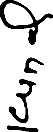

In [0]:
kk_true_4_rsz = cv2.resize(kk_true_4_thresh_crop, None, fx=0.25, fy=0.25)
cv2_imshow(kk_true_4_rsz)

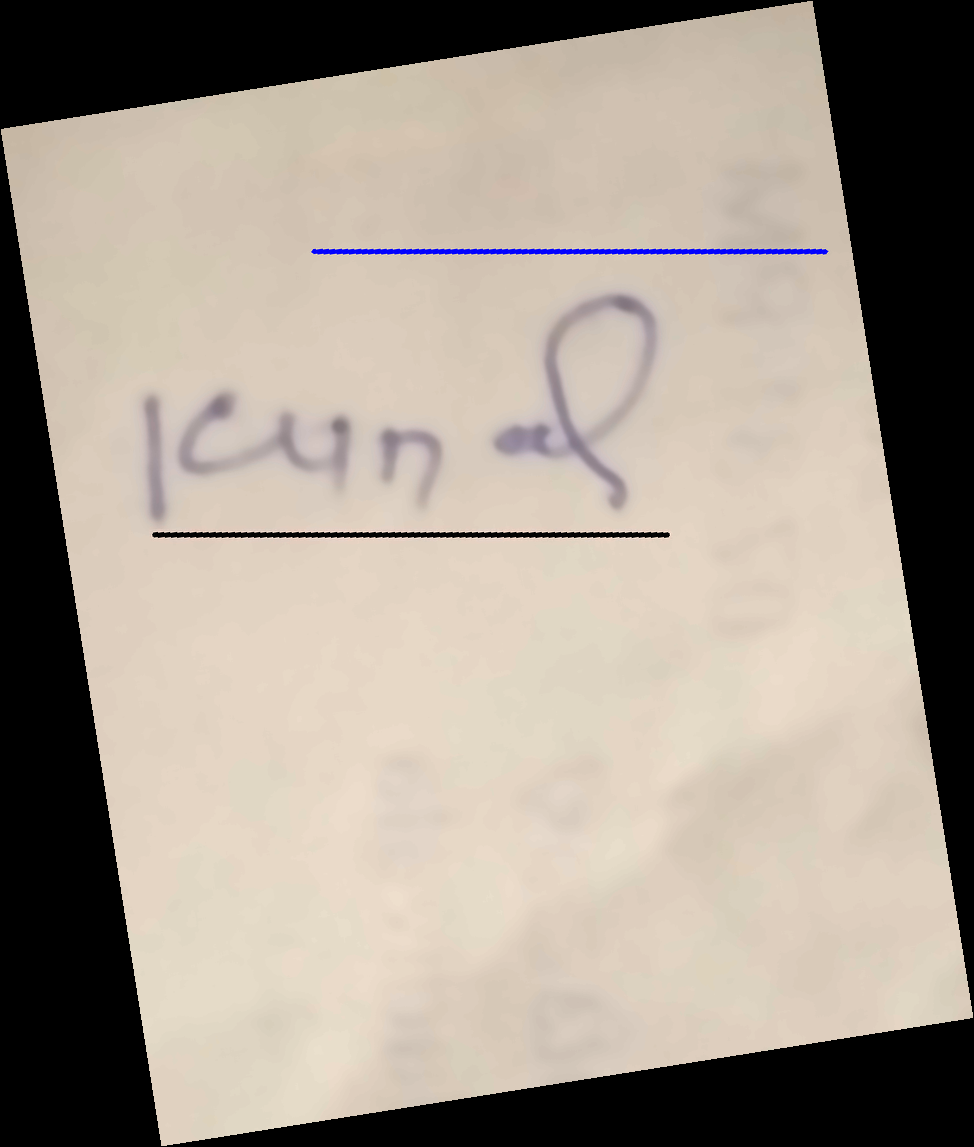

Angle is -81.01574444685998


In [0]:
# rgb(150, 140, 151)
# rgb(178, 162, 147)
# noise removing
# kk_true = cv2.imread('/content/drive/My Drive/sign-recg/DatForIMGprocessing/kk_true_1.jpg')
# kk_true= cv2.fastNlMeansDenoisingColored(kk_true, None, 10, 10, 7, 15) 
# kk_true = cv2.resize(kk_true, None, fx=0.25, fy=0.25)
# #cv2_imshow(kk_true)
# #kk_true.shape
# for pix in kk_true:
#   for p in pix:
#     if 140 <= p[0] <= 170 and 15 <= p[1] <= 175 and 10 <= p[2] <= 170:
#       p[0]=0
#       p[1]=0
#       p[2]=0
#     else:
#       p[0]=255
#       p[1]=255
#       p[2]=255
 
#cv2_imshow(kk_true)
img_before = cv2.imread('/content/drive/My Drive/sign-recg/DatForIMGprocessing/kk_true_4_line.jpg')
img_before = cv2.fastNlMeansDenoisingColored(img_before, None, 10, 10, 7, 15) 
img_gray = cv2.cvtColor(img_before, cv2.COLOR_BGR2GRAY)
ret, img_gray = cv2.threshold(img_gray, thresh=150, maxval=255, type=cv2.THRESH_BINARY)

points = np.argwhere(img_gray==0)
points = np.fliplr(points)
x, y, w, h = cv2.boundingRect(points)
x, y, w, h = x-10, y-10, w+20, h+20
img_gray = img_gray[y:y+h, x:x+w]

ret, img_gray = cv2.threshold(img_gray, thresh=200, maxval=255, type=cv2.THRESH_BINARY)


img_edges = cv2.Canny(img_gray, 100, 100, apertureSize=3)
lines = cv2.HoughLinesP(img_edges, 1, math.pi / 180.0, 100, minLineLength=100, maxLineGap=5)

angles = []
for x1, y1, x2, y2 in lines[0]:
    cv2.line(img_before, (x1, y1), (x2, y2), (255, 0, 0), 3)
    angle = math.degrees(math.atan2(y2 - y1, x2 - x1))
    angles.append(angle)

median_angle = np.median(angles)
img_rotated = ndimage.rotate(img_before, median_angle)
cv2_imshow(img_rotated)

print ("Angle is {}".format(median_angle))


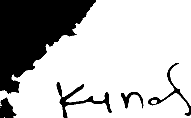

In [0]:
kk_true_1 = cv2.imread('/content/drive/My Drive/sign-recg/DatForIMGprocessing/kk_true_1.jpg')
kk_true_1 = cv2.fastNlMeansDenoisingColored(kk_true_1, None, 10, 10, 7, 15) 
kk_true_1_gray = cv2.cvtColor(kk_true_1, cv2.COLOR_BGR2GRAY)

kk_true_1_retval, kk_true_1_thresh_gray = cv2.threshold(kk_true_1_gray, thresh=150, maxval=255, type=cv2.THRESH_BINARY)

kk_true_1_points = np.argwhere(kk_true_1_thresh_gray==0)
kk_true_1_points = np.fliplr(kk_true_1_points)
kk_true_1_x, kk_true_1_y, kk_true_1_w, kk_true_1_h = cv2.boundingRect(kk_true_1_points)
kk_true_1_x, kk_true_1_y, kk_true_1_w, kk_true_1_h = kk_true_1_x, kk_true_1_y, kk_true_1_w, kk_true_1_h
kk_true_1_crop = kk_true_1_gray[kk_true_1_y:kk_true_1_y+kk_true_1_h, kk_true_1_x:kk_true_1_x+kk_true_1_w]

kk_true_1_retval,kk_true_1_thresh_crop = cv2.threshold(kk_true_1_crop, thresh=171, maxval=255, type=cv2.THRESH_BINARY)

kk_true_1_rsz = cv2.resize(kk_true_1_thresh_crop, None, fx=0.25, fy=0.25)
cv2_imshow(kk_true_1_rsz)

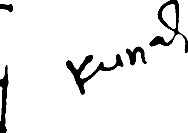

In [0]:
kk_true_2 = cv2.imread('/content/drive/My Drive/sign-recg/DatForIMGprocessing/kk_true_2.jpg') 
kk_true_2 = cv2.fastNlMeansDenoisingColored(kk_true_2, None, 10, 10, 7, 15) 
kk_true_2_gray = cv2.cvtColor(kk_true_2, cv2.COLOR_BGR2GRAY)

kk_true_2_retval, kk_true_2_thresh_gray = cv2.threshold(kk_true_2_gray, thresh=145, maxval=255, type=cv2.THRESH_BINARY)

kk_true_2_points = np.argwhere(kk_true_2_thresh_gray==0)
kk_true_2_points = np.fliplr(kk_true_2_points)
kk_true_2_x, kk_true_2_y, kk_true_2_w, kk_true_2_h = cv2.boundingRect(kk_true_2_points)
kk_true_2_x, kk_true_2_y, kk_true_2_w, kk_true_2_h = kk_true_2_x, kk_true_2_y, kk_true_2_w, kk_true_2_h
kk_true_2_crop = kk_true_2_gray[kk_true_2_y:kk_true_2_y+kk_true_2_h, kk_true_2_x:kk_true_2_x+kk_true_2_w]

kk_true_2_retval,kk_true_2_thresh_crop = cv2.threshold(kk_true_2_crop, thresh=165, maxval=255, type=cv2.THRESH_BINARY)

kk_true_2_rsz = cv2.resize(kk_true_2_thresh_crop, None, fx=0.25, fy=0.25)
cv2_imshow(kk_true_2_rsz)

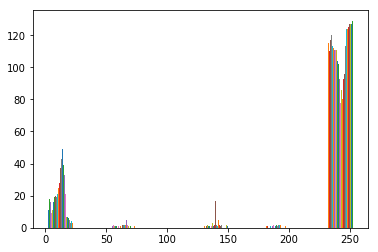

In [0]:
plt.hist(kk_true_4_rsz)
plt.show()

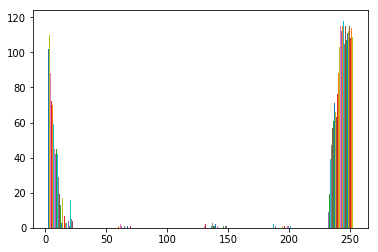

In [0]:
plt.hist(kk_true_1_rsz)
plt.show()

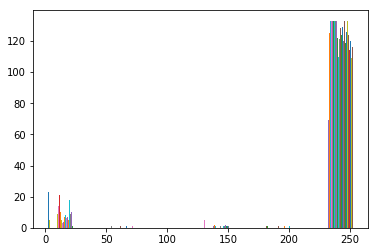

In [0]:
plt.hist(kk_true_2_rsz)
plt.show()